In [1]:
import torch
from dpm.models import LinearDiscriminantAnalysis
from dpm.distributions import Normal
from dpm.visualize import plot_stats, plot_models, plot_model, plot_hist

In [2]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1)
y.shape

torch.Size([3000, 1])

In [3]:
x_model_0 = Normal(torch.zeros(10)+4., torch.eye(10)*2 + 4)
x_model_1 = Normal(torch.zeros(10)-2, torch.eye(10)*5 - 0.2)
# plot_models(x_model_0, x_model_1)
x = torch.cat((x_model_0.sample(1000).detach(), x_model_1.sample(2000).detach()), dim=0)
x.shape

torch.Size([3000, 10])

In [4]:
model = LinearDiscriminantAnalysis(n_features=10)

In [5]:
model.log_prob(x, y)

tensor([-183.5702,  -79.9705, -151.5675,  ...,  -38.3290,  -49.0702,
         -63.4743], grad_fn=<SumBackward2>)

In [6]:
stats = model.fit(x, y)

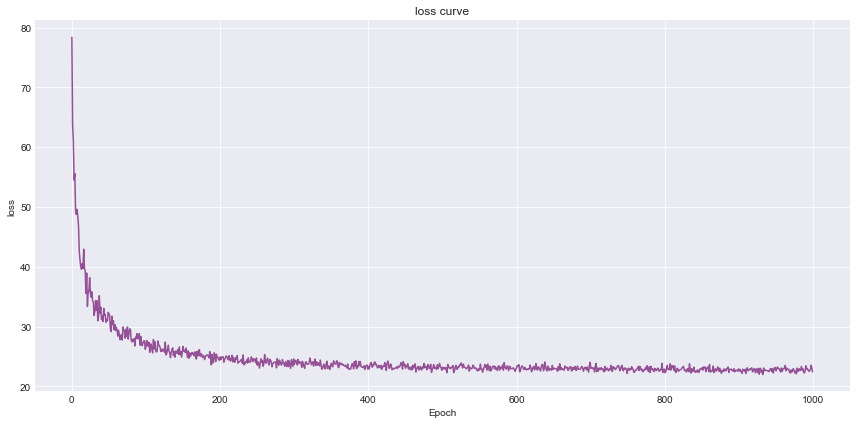

In [7]:
plot_stats(stats)

In [8]:
model.y_dist.probs

tensor([0.3456, 0.6544], grad_fn=<SoftmaxBackward>)

In [9]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9790)

In [10]:
model.x_means

Parameter containing:
tensor([[ 2.5150,  1.8252,  2.2344,  1.5669,  2.5796,  2.4569,  2.4053,  2.4891,
          2.2818,  1.8821],
        [-1.7431, -1.6622, -1.6874, -1.6236, -1.6647, -1.6653, -1.6788, -1.6873,
         -1.6547, -1.6739]], requires_grad=True)

In [12]:
model.covariance

tensor([[5.9346, 2.5779, 2.2820, 2.6544, 1.8984, 2.0678, 2.3104, 2.0965, 2.2401,
         2.3196],
        [2.5779, 7.0779, 2.7298, 3.5084, 2.4870, 2.5801, 2.8031, 2.5519, 2.6752,
         3.3090],
        [2.2820, 2.7298, 6.6533, 2.9930, 1.9682, 2.4258, 2.3696, 2.3238, 2.3707,
         2.7478],
        [2.6544, 3.5084, 2.9930, 7.5178, 2.4694, 2.8299, 2.8387, 2.7188, 2.8926,
         3.3724],
        [1.8984, 2.4870, 1.9682, 2.4694, 5.8482, 2.0028, 2.1103, 1.7755, 1.9687,
         2.3032],
        [2.0678, 2.5801, 2.4258, 2.8299, 2.0028, 6.1338, 2.2773, 2.1474, 2.2328,
         2.6715],
        [2.3104, 2.8031, 2.3696, 2.8387, 2.1103, 2.2773, 6.3482, 2.1153, 2.3465,
         2.9348],
        [2.0965, 2.5519, 2.3238, 2.7188, 1.7755, 2.1474, 2.1153, 6.0937, 2.4361,
         2.4531],
        [2.2401, 2.6752, 2.3707, 2.8926, 1.9687, 2.2328, 2.3465, 2.4361, 6.3407,
         2.8488],
        [2.3196, 3.3090, 2.7478, 3.3724, 2.3032, 2.6715, 2.9348, 2.4531, 2.8488,
         7.0821]], grad_fn=<

In [13]:
X = model.sample(5)
print(X)

tensor([[ 1.0728,  2.5653,  0.8090,  0.1805,  3.1566,  1.3508,  4.8090,  1.9021,
         -0.8497,  1.7023],
        [ 4.3063,  1.6318, -0.4247,  0.4186,  3.8545,  5.8062,  4.6089, -1.0521,
          0.1517,  3.4393],
        [-3.4118, -5.7259,  0.1897, -3.7110, -0.2796, -4.1151, -1.1243, -2.3255,
          0.6068, -2.4402],
        [ 5.2554,  2.1021, -0.3554,  1.8717,  1.2611,  3.6347,  0.4310,  2.1572,
         -0.4587,  2.1327],
        [-4.9617, -5.3521, -3.7835, -1.6561, -0.1250, -1.7195, -5.0228, -4.5243,
         -3.0971, -2.9051]], grad_fn=<IndexBackward>)


In [14]:
model.predict(X)

tensor([[0],
        [0],
        [1],
        [0],
        [1]])

In [ ]:
# plot_hist(model.sample(5000).detach())